In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
from tqdm import tqdm


In [2]:
file_name = "/home/aqib/UrbanSound8K/Dog_bark.wav"

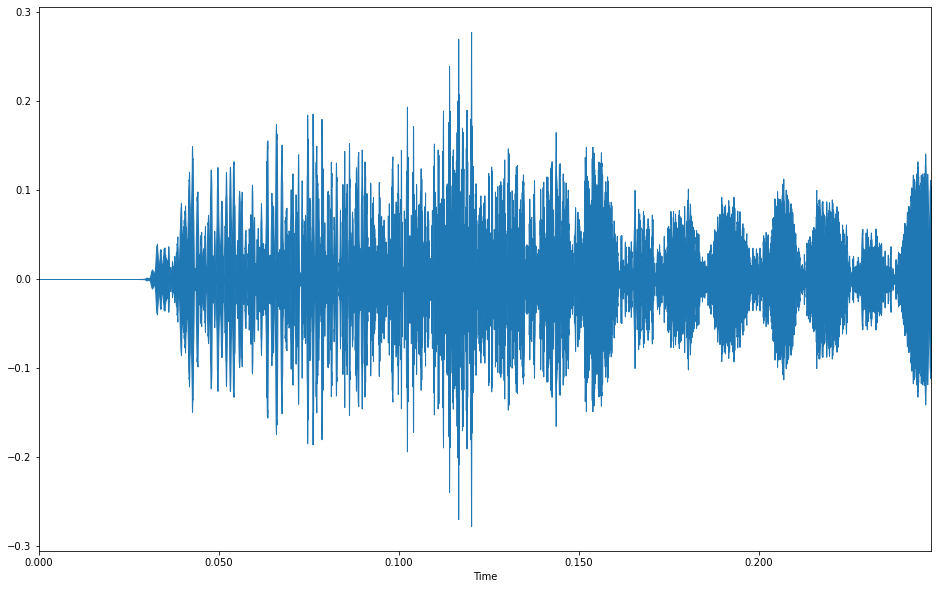

In [3]:
plt.figure(figsize=(16,10))
data,sample_rate = librosa.load(file_name)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(file_name)

In [4]:
sample_rate

22050

In [5]:
from scipy.io import wavfile
wav_sample_rate,wav_audio = wavfile.read(file_name)

In [6]:
wav_sample_rate

44100

In [7]:
wav_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-2357, -2032],
       [-2327, -2161],
       [-2596, -2295]], dtype=int16)

In [8]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.07455782,
       -0.07427226,  0.        ], dtype=float32)

In [9]:
df = pd.read_csv('/home/aqib/UrbanSound8K/metadata/UrbanSound8K.csv')

In [10]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [13]:
df['class'].value_counts()

air_conditioner     1000
drilling            1000
children_playing    1000
dog_bark            1000
street_music        1000
jackhammer          1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

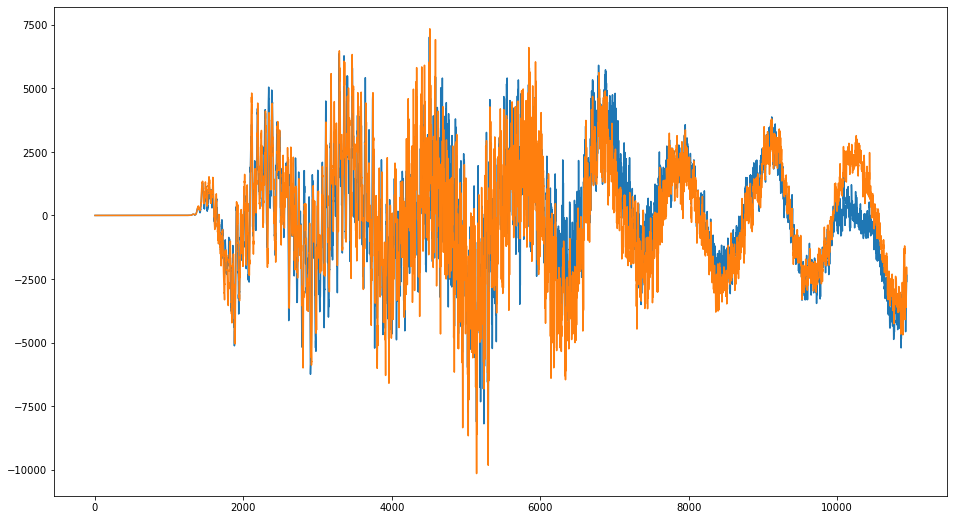

In [14]:
plt.figure(figsize=(16,9))
plt.plot(wav_audio)

In [15]:
mfccs = librosa.feature.mfcc(y=data,sr=sample_rate)
print(mfccs.shape)

(20, 11)


In [16]:
mfccs

array([[-5.27520935e+02, -2.93282715e+02, -1.90003784e+02,
        -1.52674576e+02, -1.39339722e+02, -1.42487640e+02,
        -1.60361038e+02, -1.89350449e+02, -2.17289413e+02,
        -2.33016800e+02, -2.27845825e+02],
       [ 1.31533112e+02,  1.35372223e+02,  1.25179581e+02,
         1.03865891e+02,  8.84239883e+01,  9.06229477e+01,
         9.16858063e+01,  8.85056534e+01,  8.18104935e+01,
         8.21154251e+01,  8.09827423e+01],
       [ 1.98278122e+01,  1.10411358e+01, -1.48624408e+00,
        -1.43112316e+01, -1.40572071e+01, -7.05646813e-01,
         2.02099919e+00,  4.87855196e+00,  2.10169244e+00,
         8.11671257e+00,  4.75461578e+00],
       [-1.69313502e+00, -5.06422901e+00, -2.36067152e+00,
         5.87041330e+00,  1.15253983e+01,  1.14624023e+01,
         1.19005833e+01,  1.36548052e+01,  1.77582054e+01,
         1.60753117e+01,  6.77493572e+00],
       [-8.36894417e+00, -1.89570522e+01, -2.23668709e+01,
        -3.20293503e+01, -4.68006134e+01, -5.48897552e+01,
  

In [17]:
audio_path = '/home/aqib/UrbanSound8K/audio/'

In [18]:
def feature_extract(file):
    audio,sample_rate = librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_feature = np.mean(mfccs.T,axis=0)
    return mfccs_scaled_feature

In [19]:
extracted_features = []
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    final_class_label = row['class']
    data = feature_extract(file_name)
    extracted_features.append([data,final_class_label])

3555it [07:09,  7.43it/s]/home/aqib/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [16:20, 11.61it/s]/home/aqib/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8328it [16:20, 17.80it/s]/home/aqib/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [17:05,  8.51it/s]


In [20]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['features','class']) 
extracted_features_df.head(9)

,features,class
0,"[-224.8339, 100.0089, 2.0164719, 7.809456, -26...",dog_bark
1,"[-224.8339, 100.0089, 2.0164719, 7.809456, -26...",children_playing
2,"[-224.8339, 100.0089, 2.0164719, 7.809456, -26...",children_playing
3,"[-224.8339, 100.0089, 2.0164719, 7.809456, -26...",children_playing
4,"[-224.8339, 100.0089, 2.0164719, 7.809456, -26...",children_playing
5,"[-224.8339, 100.0089, 2.0164719, 7.809456, -26...",children_playing
6,"[-224.8339, 100.0089, 2.0164719, 7.809456, -26...",children_playing
7,"[-224.8339, 100.0089, 2.0164719, 7.809456, -26...",children_playing
8,"[-224.8339, 100.0089, 2.0164719, 7.809456, -26...",children_playing


In [21]:
X = np.array(extracted_features_df['features'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [22]:
X.shape

(8732, 20)

In [23]:
y.shape

(8732,)

In [24]:
y = np.array(pd.get_dummies(y))

In [25]:
y.shape

(8732, 10)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)


In [27]:
X_train.shape

(5850, 20)

In [28]:
X_test.shape

(2882, 20)

In [29]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [30]:
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
num_labels = y.shape[1]

In [32]:
model = Sequential()

In [33]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,40)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [34]:
# final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40, 100)           4100      
_________________________________________________________________
activation (Activation)      (None, 40, 100)           0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 100)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 40, 200)           20200     
_________________________________________________________________
activation_1 (Activation)    (None, 40, 200)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 200)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 40, 100)          

In [36]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [38]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [40]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

In [42]:
prediction_feature.shape
